## Check noised dataset priors

In [22]:
import os, sys
import itertools

from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import torch

###

SRC_DIR = os.path.join(
    os.path.dirname(os.getcwd()), "protdiff"
)
assert os.path.isdir(SRC_DIR)
sys.path.append(SRC_DIR)
import datasets
from plotting import PLOT_DIR

In [3]:
cath_dset = datasets.CathConsecutiveAnglesDataset(split='train')
len(cath_dset)

12673

In [57]:
beta_schedule = "cosine"

noised_cath_dset = datasets.NoisedAnglesDataset(
    cath_dset,
    dset_key="angles",
    beta_schedule=beta_schedule,
    timesteps=1000,
)
noised_cath_dset[0].keys()

dict_keys(['angles', 'attn_mask', 'corrupted', 't', 'known_noise'])

  0%|          | 0/12673 [00:00<?, ?it/s]

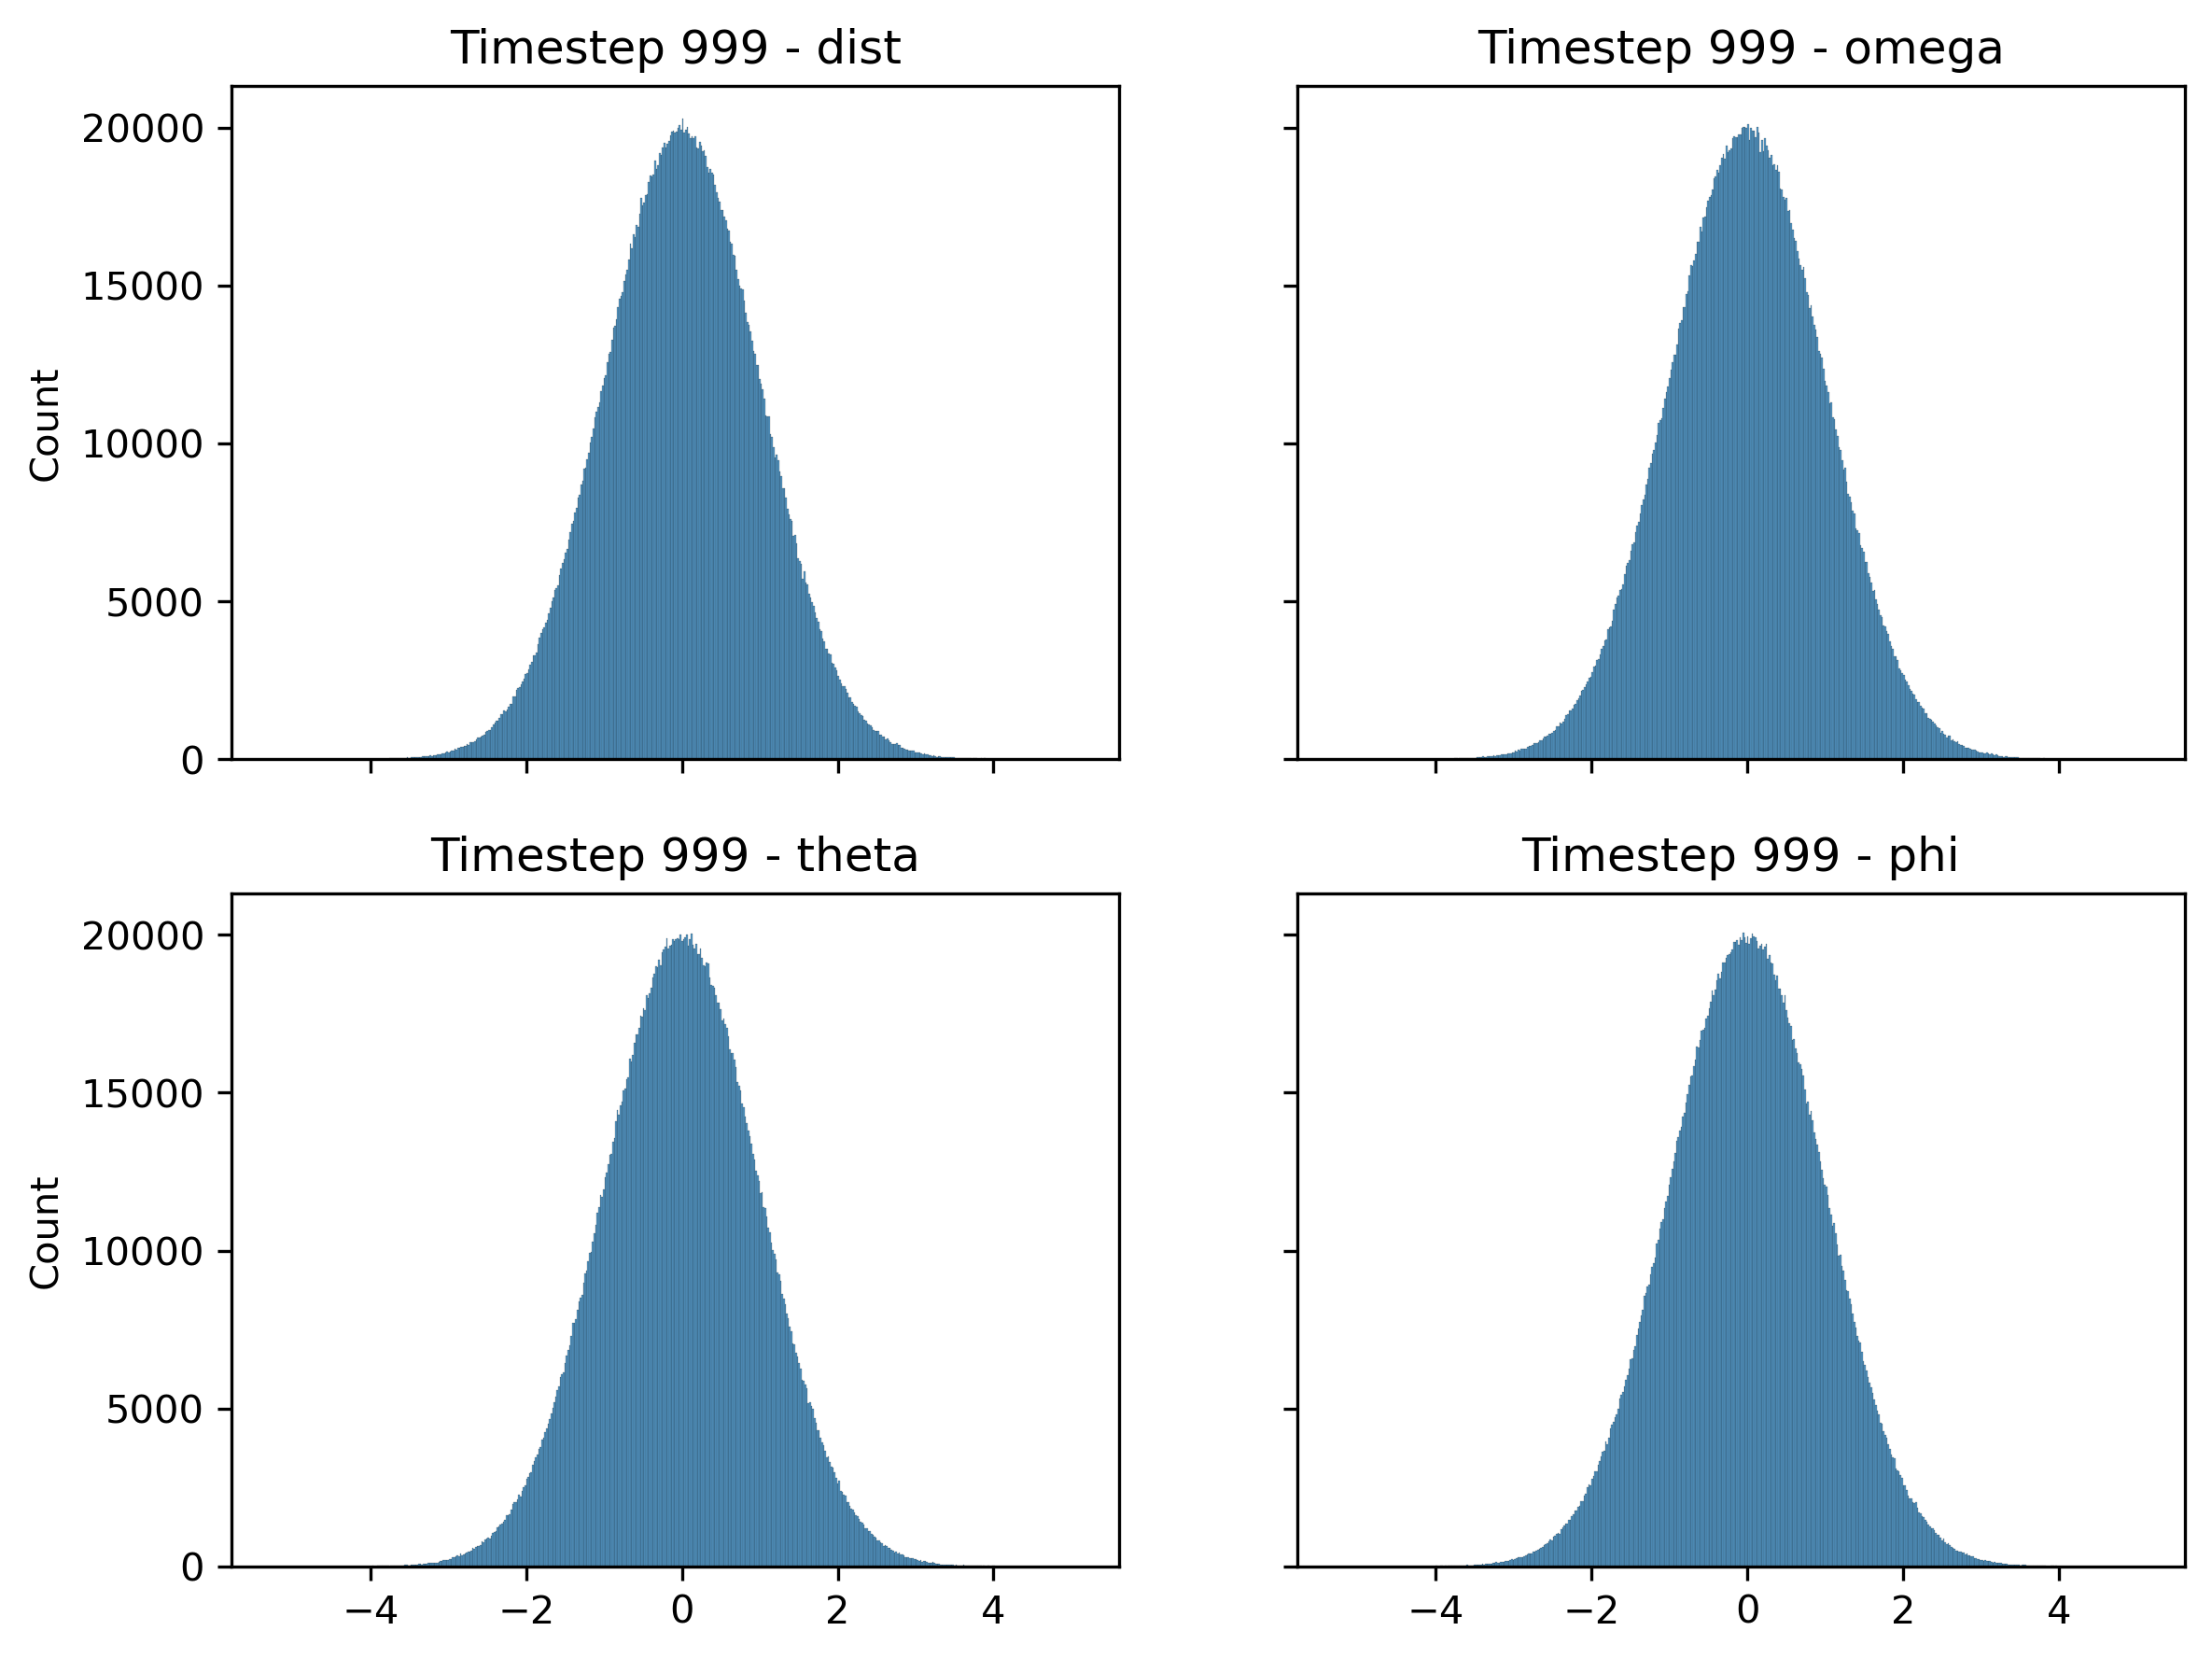

In [58]:
def plot_val_dists_at_t(dset, t:int, share_axes:bool=True):
    select_by_attn = lambda x: x['corrupted'][torch.where(x['attn_mask'])]

    retval = []
    for i in tqdm(range(len(dset))):
        vals = dset.__getitem__(i, use_t_val=t)
        assert vals['t'].item() == t
        retval.append(select_by_attn(vals))
    vals_flat = torch.vstack(retval).numpy()
    assert len(vals_flat.shape) == 2

    fig, axes = plt.subplots(2, 2, sharex=share_axes, sharey=share_axes, dpi=300, figsize=(9, 7))
    for i, ax in enumerate(axes.flatten()):
        sns.histplot(vals_flat[:, i], ax=ax)
        val_name = ['dist', 'omega', 'theta', 'phi'][i]
        ax.set(
            title=f"Timestep {t} - {val_name}"
        )
    return fig

plot_val_dists_at_t(noised_cath_dset, 999).show()

  0%|          | 0/12673 [00:00<?, ?it/s]

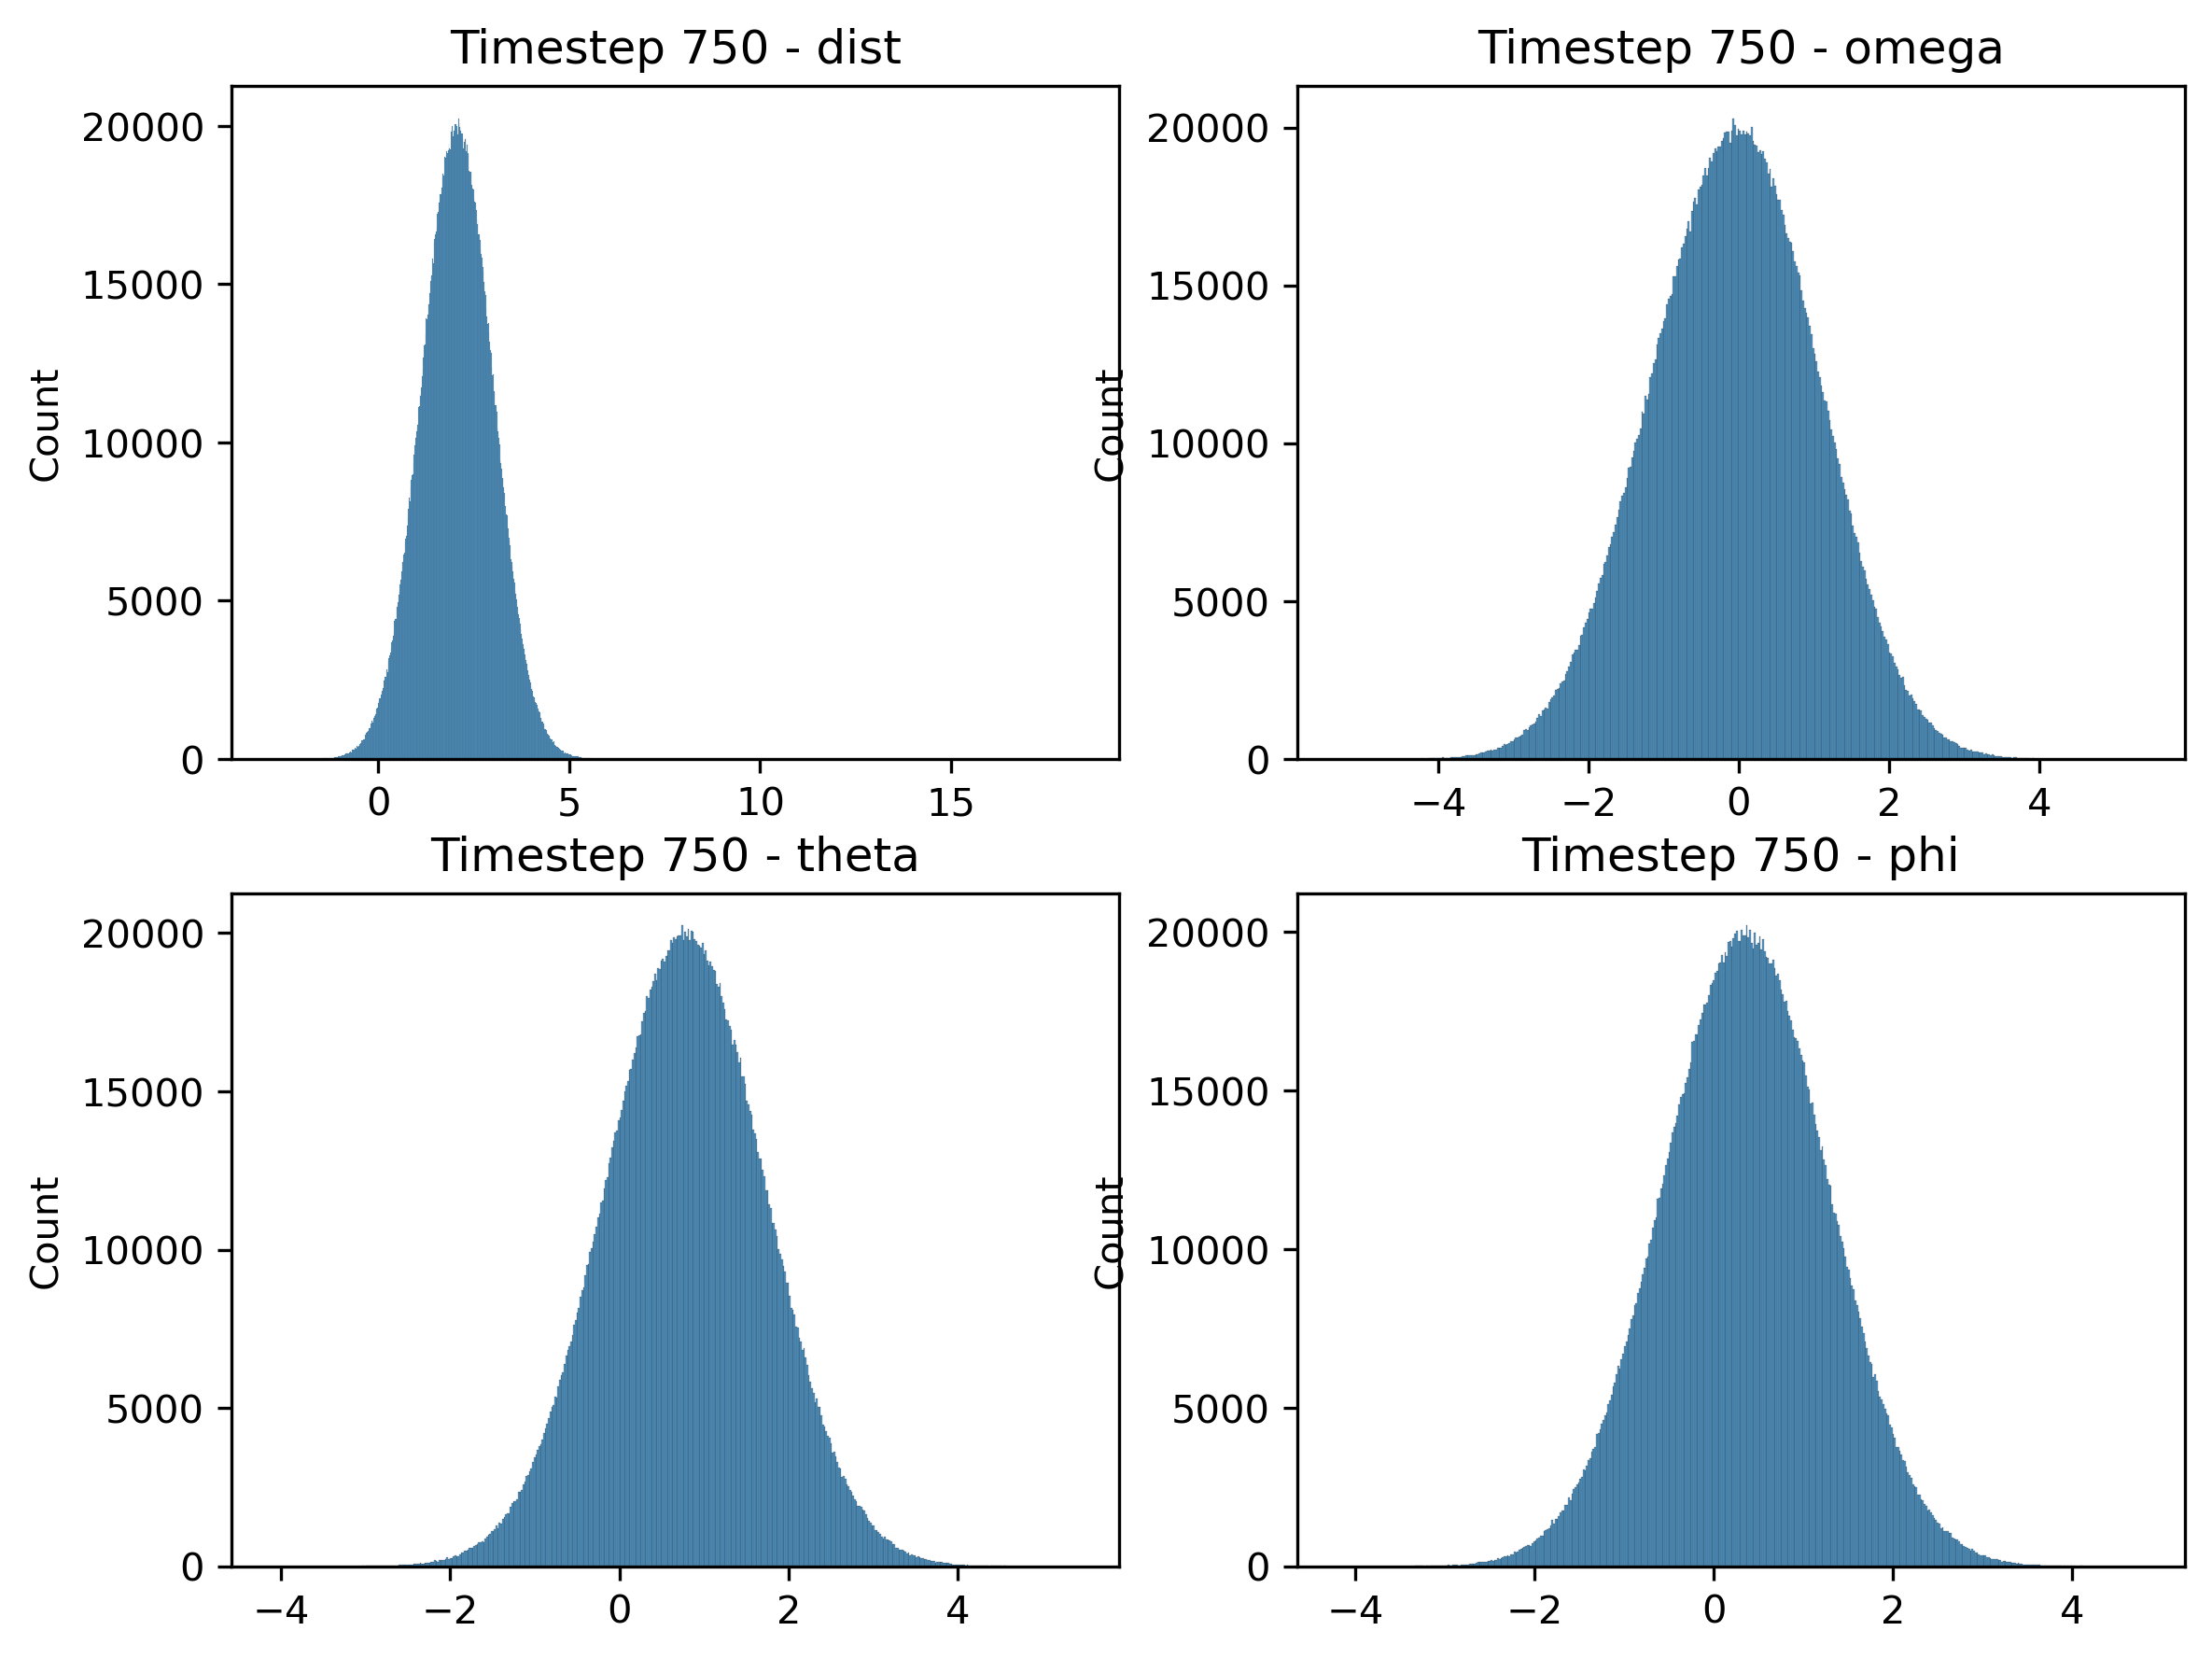

In [59]:
plot_val_dists_at_t(noised_cath_dset, 750, share_axes=False).show()

  0%|          | 0/12673 [00:00<?, ?it/s]

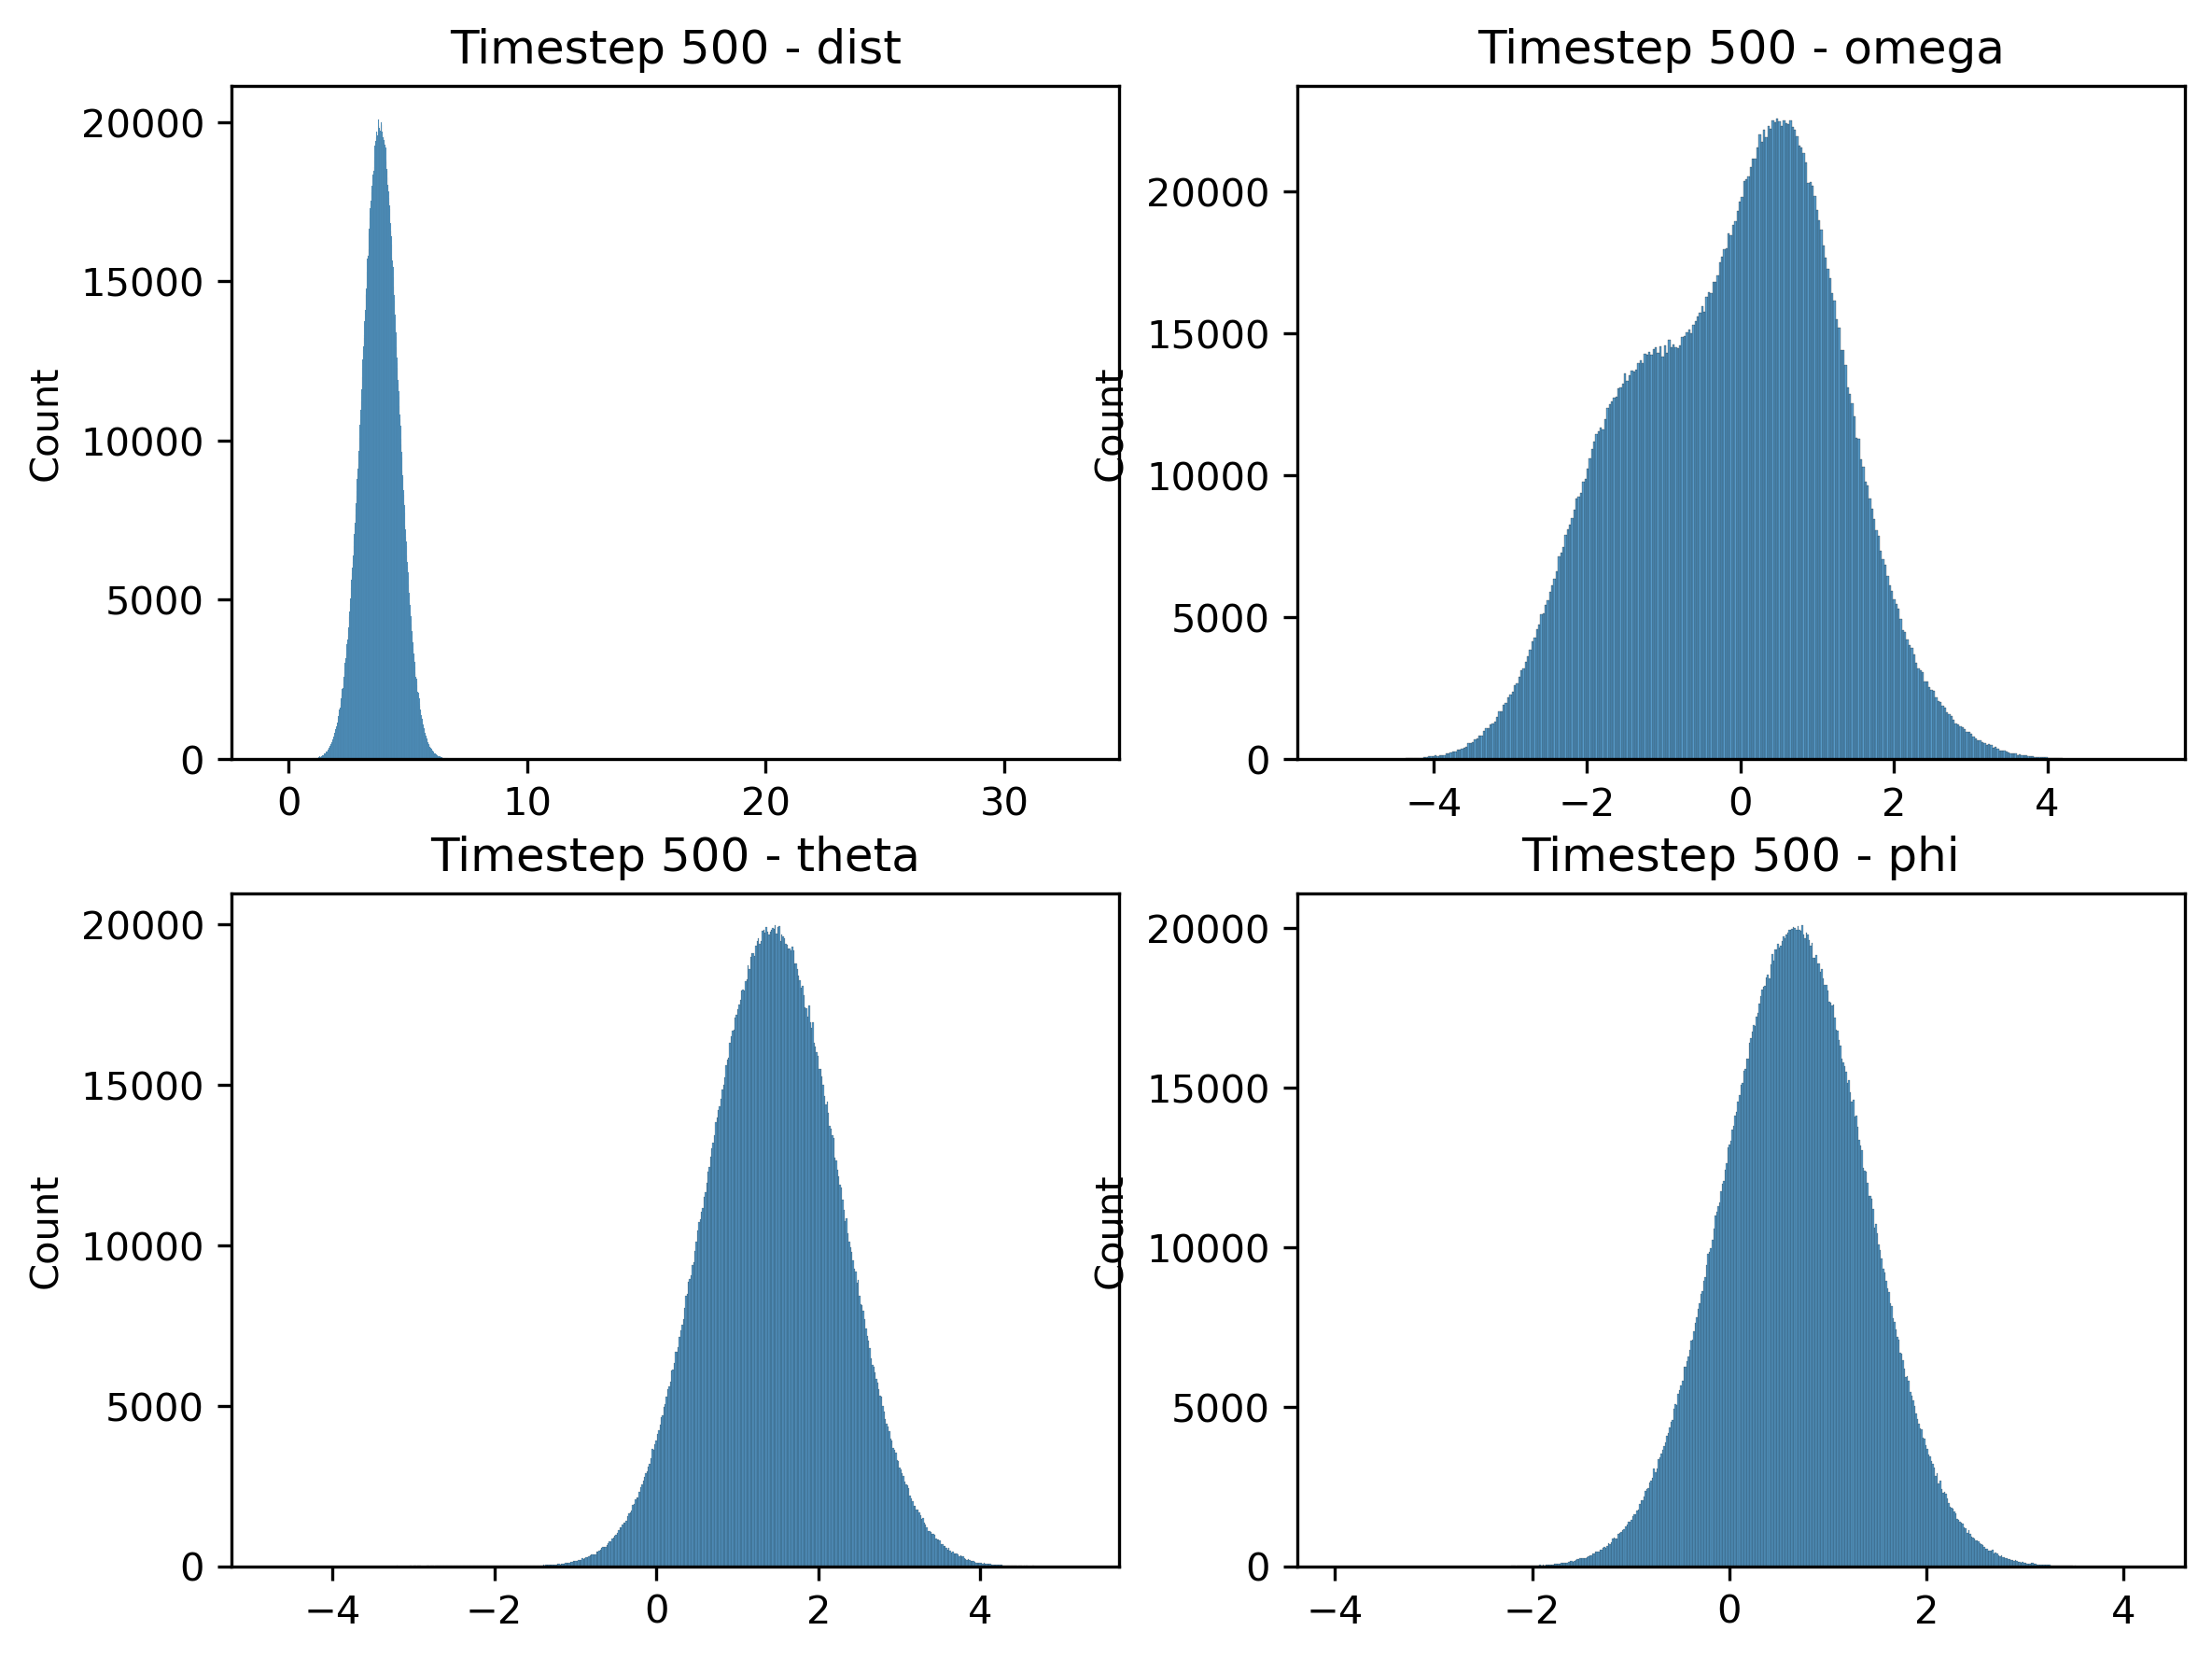

In [60]:
plot_val_dists_at_t(noised_cath_dset, 500, share_axes=False).show()

  0%|          | 0/12673 [00:00<?, ?it/s]

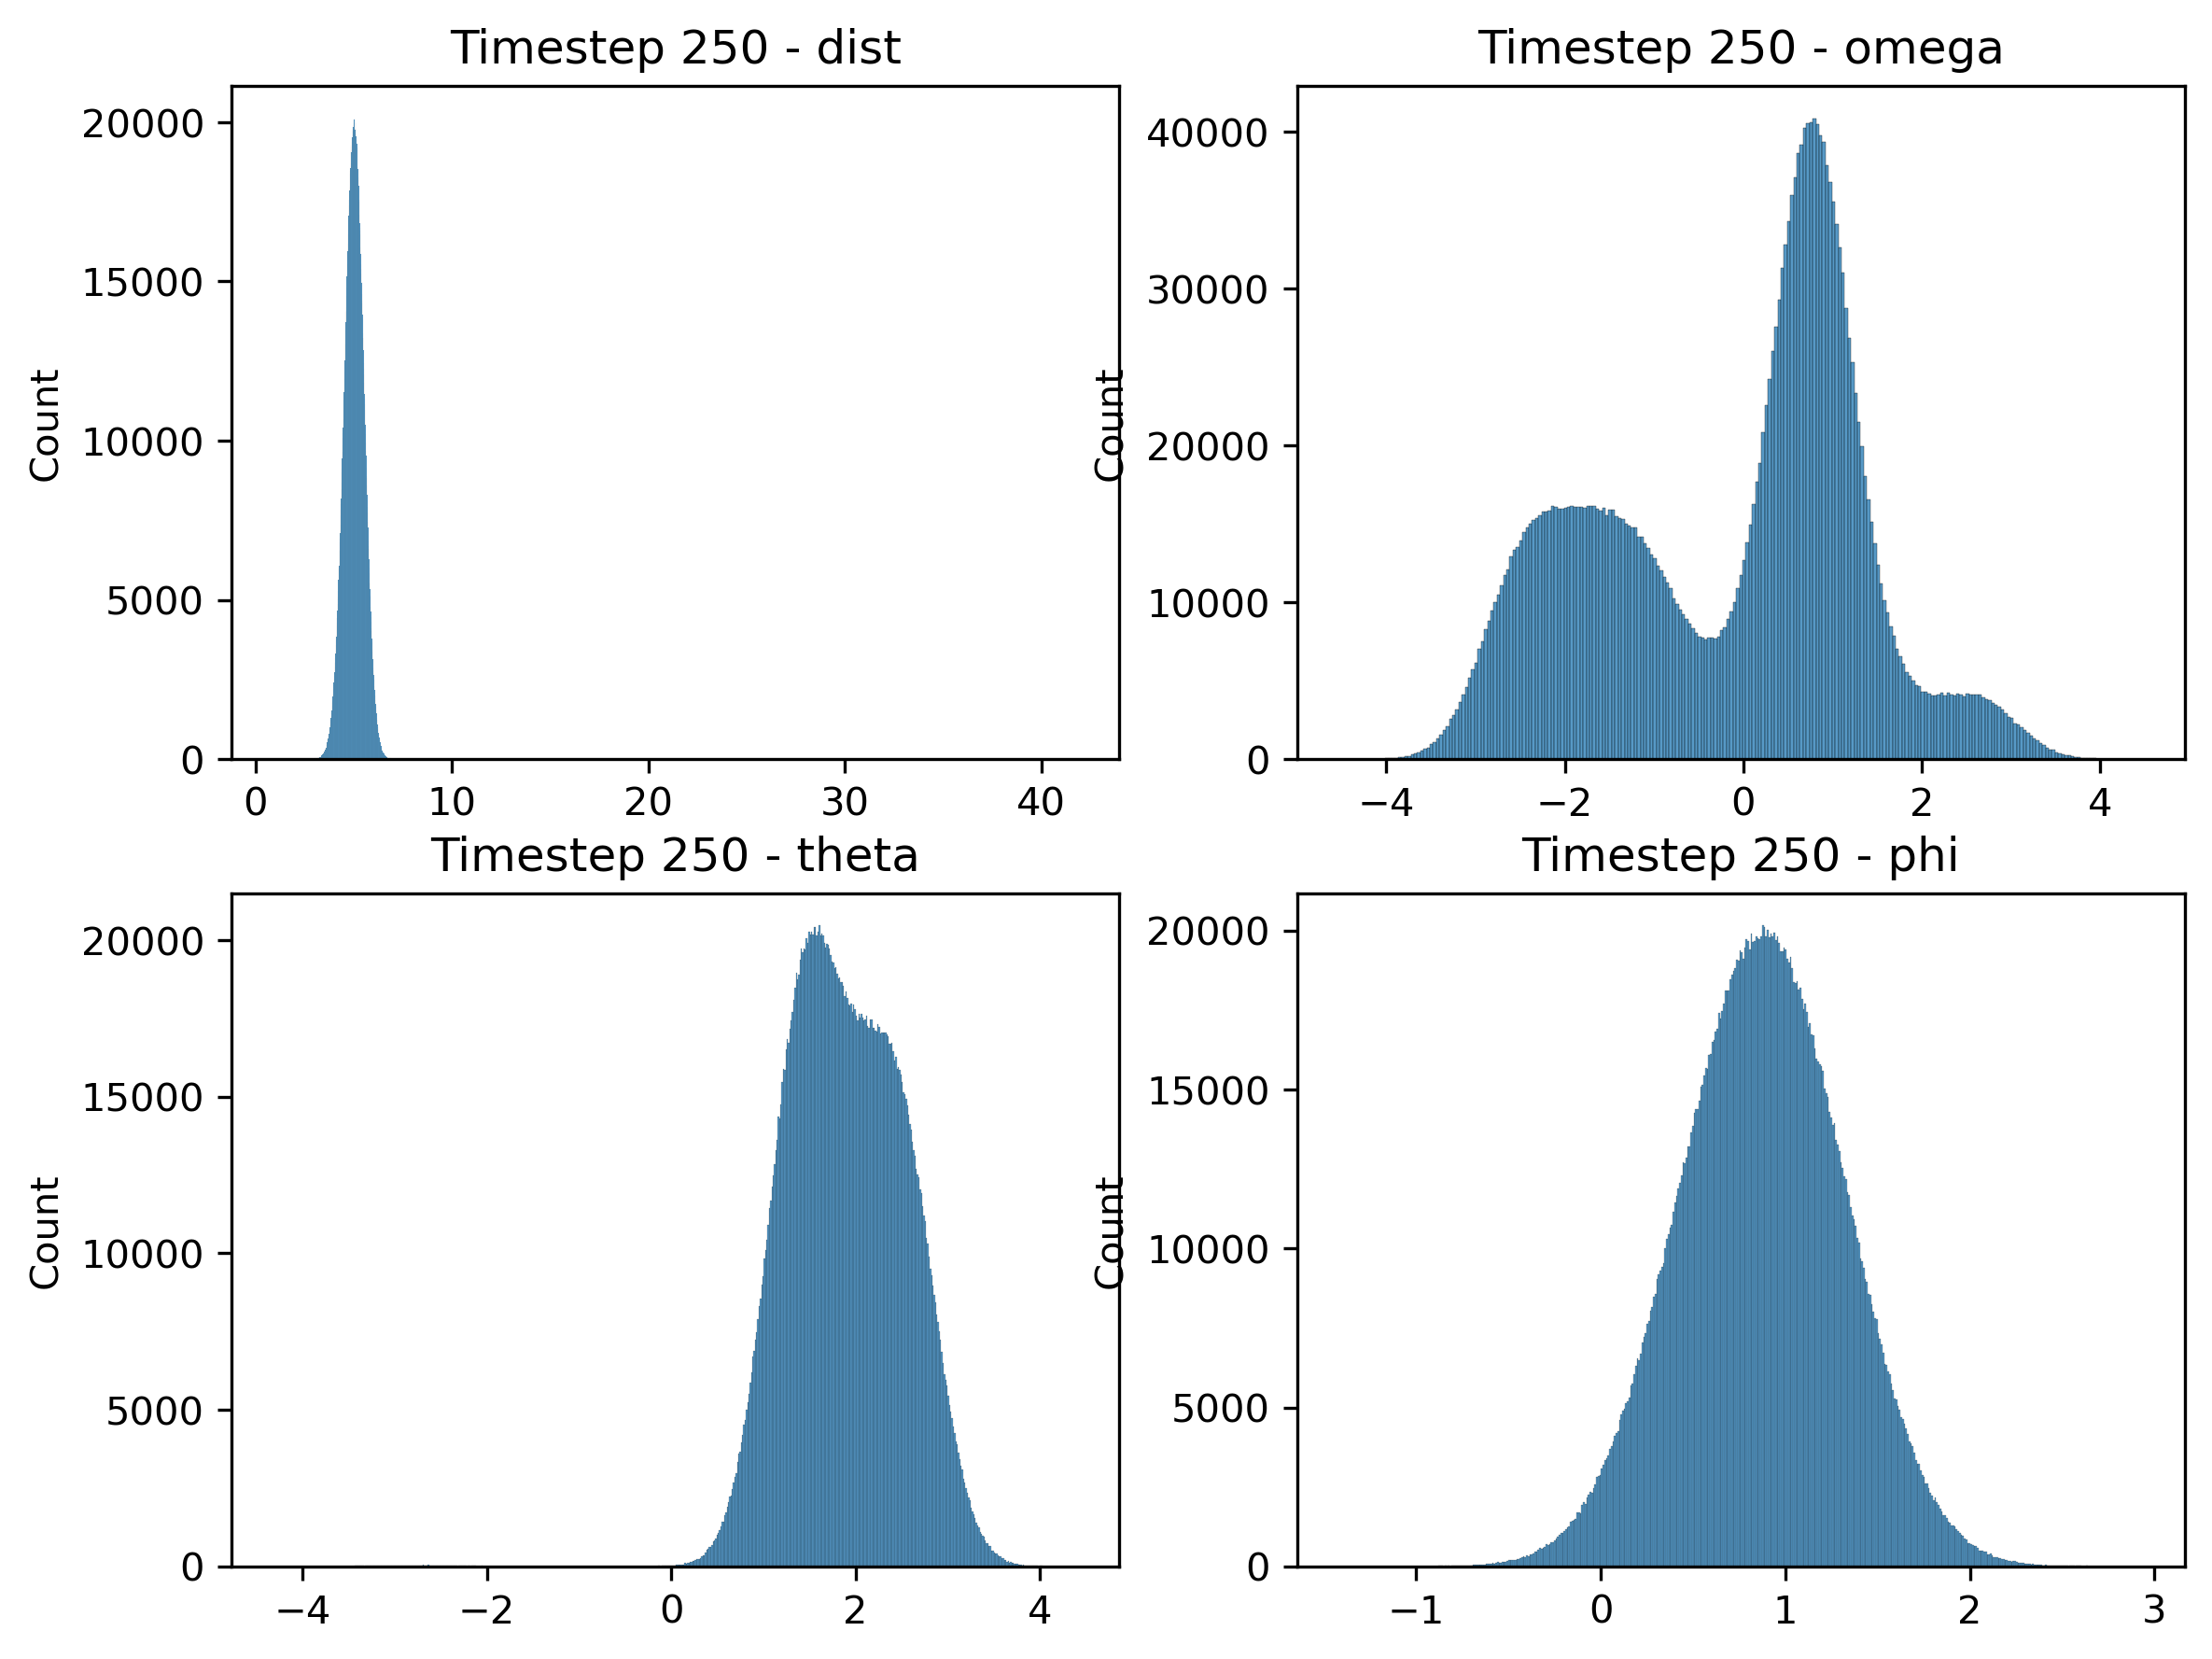

In [61]:
plot_val_dists_at_t(noised_cath_dset, 250, share_axes=False).show()

  0%|          | 0/12673 [00:00<?, ?it/s]

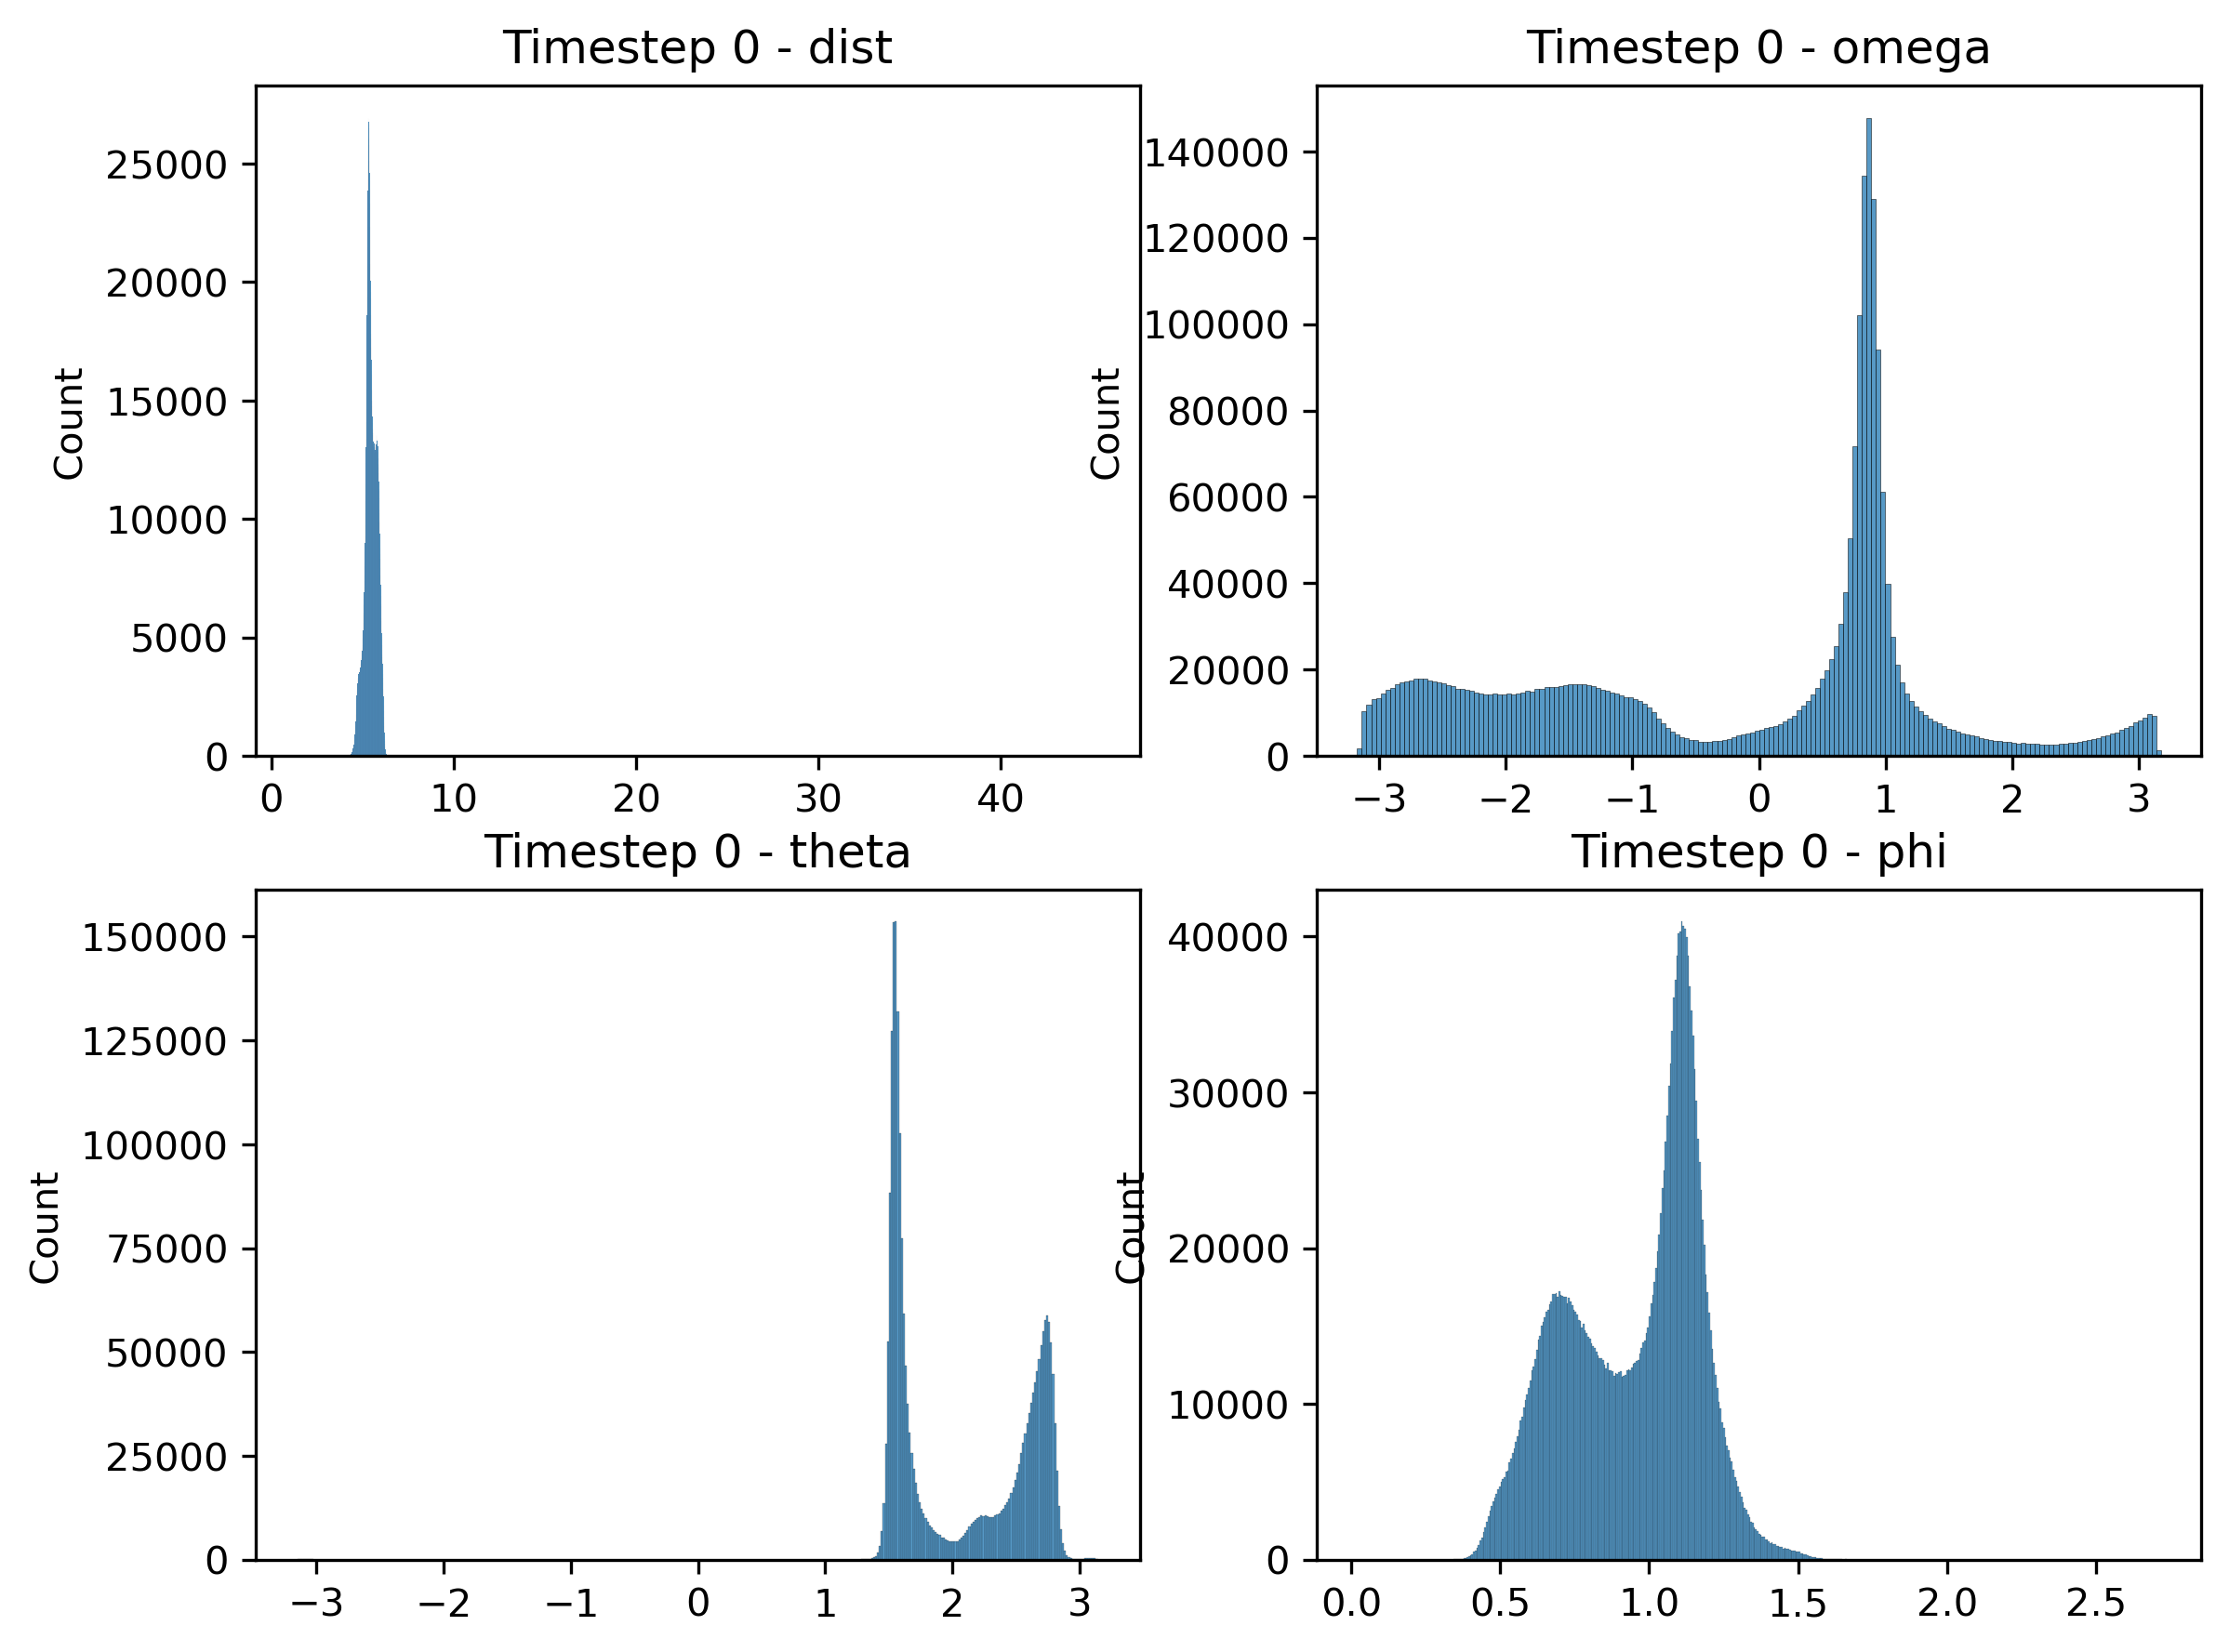

In [62]:
plot_val_dists_at_t(noised_cath_dset, 0, share_axes=False).show()